In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("ex2data.csv")
print(len(df))
df.head()

217


,Exam_1,Exam_2,Admission Status
0,76.098787,87.420570,1
1,55.482161,35.570703,0
2,82.368754,40.618255,0
3,34.212061,44.209529,0
4,16.647000,53.874000,1


In [38]:
x1 = df['Exam_1'].to_numpy()
x2 = df['Exam_2'].to_numpy()
y = df['Admission Status'].to_numpy()
x = np.array([x1,x2]).T
y = np.array([y]).T
m = len(x1)

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
# Ensure consistent results by setting a random seed
tf.random.set_seed(1234)

# Create the model
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='linear', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [43]:
# Train the model
history = model.fit(x, y, epochs=10, batch_size=1)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 25.4713
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 15.6331
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 12.1469
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 9.9143
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 8.0868
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 6.5124
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 5.1634
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 4.0090
Epoch 9/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 3.0179
Epoch 10/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 2.1666


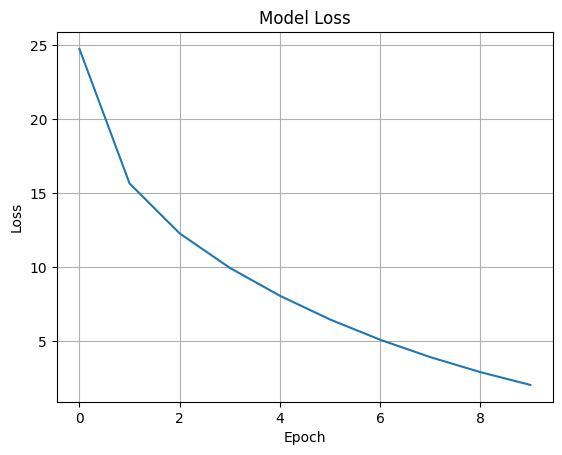

In [44]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()


In [45]:
# Get trained weights
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("\n")
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-0.66891867 -0.7315736  -0.9083792 ]
 [ 0.04820546  0.03845229 -0.1630734 ]] 
b1: [-0.33505505 -0.35019022  0.36381844]


W2:
 [[ 0.2987303]
 [ 0.4820933]
 [-0.4987886]] 
b2: [-0.38871214]


In [46]:
# Test data
X_test = np.array([
    [82.368754,	40.618255], 
    [16.647000,	53.874000]   
])

In [47]:
# Make predictions
y_test = model.predict(X_test)
y_test = np.where(y_test >= 0.5, 1, 0)   # Convert predictions to binary output (0 or 1)
print(f"decisions = \n{y_test}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
decisions = 
[[0]
 [1]]
